In [1]:
!ls ../test_data/

 aditya_game
 call_of_duty.pickle
 facebook.pickle
'[f]aditya_eyes_closed|151019_144531.pickle'
'[f]aditya_work|151019_150218.pickle'
'[f]facebook|141019_160022.pickle'
'[f]hcl_1|111019_142206.pickle'
'[f]raghav_game|251019_210423.pickle'
'[f]social_media|111019_153856.pickle'
 raghav_eyes_closed
 raghav_game
 raghav_work
 sashi_eyes_closed
 sashi_work
 SingleBlinksData


In [2]:
import sys
sys.path.append('../')
import data as d
data = d.load_pickle_file('../test_data/[f]raghav_game|251019_210423.pickle')

Using config.dataReader - random number
Loading data file ../test_data/[f]raghav_game|251019_210423.pickle 
First 10 epochs will be removed while loading the data.


In [3]:
data.shape

(290, 8, 250)

In [4]:
data.shape

(290, 8, 250)

In [5]:
from features import feature_removal as fr

data = d.clean_data(data,threshold_fn=fr.energy_of_epoch,channels=range(8),do_bandpass=True)

Processing file:1


In [6]:
data.shape

(427, 8, 250)

In [7]:
bandpower = d.epoch_bandpower(data,channels=range(8),per_epoch=1)

Processing file:1


/usr/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 500 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))


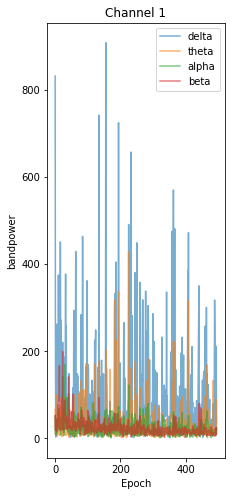

In [13]:
d.plot_bandpower(bandpower)

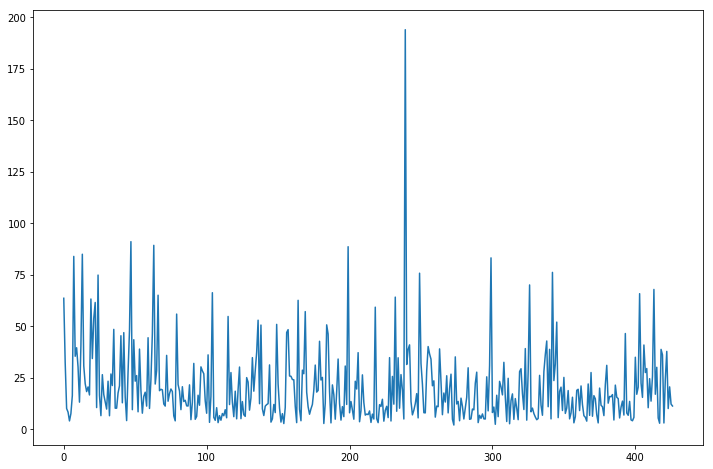

In [8]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(bandpower[:,1,2].reshape(-1))

In [29]:
import numpy as np
def moving_average(a, n=8) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

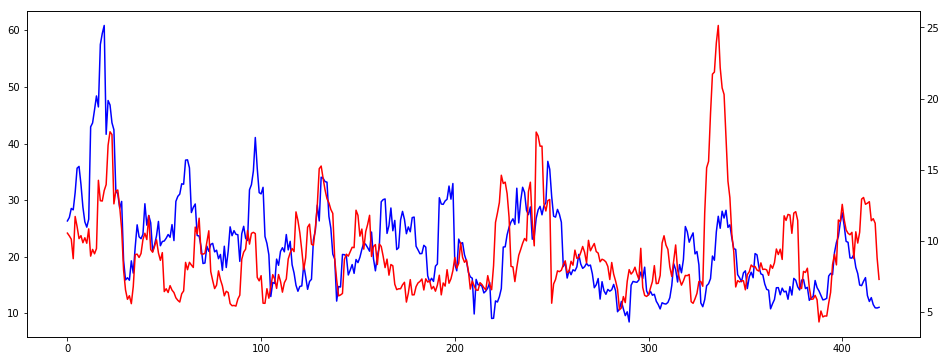

In [31]:
out1 = moving_average(bandpower[:,0,2])
out2 = moving_average(bandpower[:,6,2])

import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(16,6))
ax.plot(out1.reshape(-1), 'b')
ax1 = ax.twinx()
ax1.plot(out2.reshape(-1), 'r')

# out1 = moving_average(bandpower[:,6,2])
# out2 = moving_average(bandpower[:,7,2])

# ax[1].plot(out1.reshape(-1))
# ax[1].plot(out2.reshape(-1))

In [32]:
grad_out1 = np.gradient(out1)
grad_out2 = np.gradient(out2)

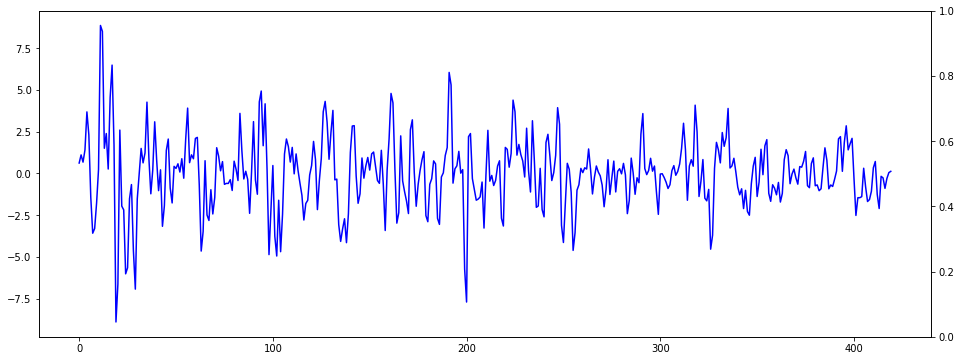

In [34]:
fig,ax = plt.subplots(1,1,figsize=(16,6))
ax.plot(grad_out1.reshape(-1), 'b')
ax1 = ax.twinx()
#ax1.plot(grad_out2.reshape(-1), 'r')